# Apresentação:

Esse notebook é para tratar de topicos finais do curso, como a parte de **evaluation**, **carregamento de dados**, **performance** e ***overfitting***. Aqui é a parte final do curso, então os temas sobre PyTorch que não forem apresentados aqui, salvo nos contemplados nos *notebooks* anteriores, não serão apresentados aqui.

In [1]:
# Bibliotecas:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset

## Baixando dados:

Antes de começar o estudo, precisamos baixar os dados utilizados na contrução do modelo. Como o curso não disponibiliza, a ideia aqui é fazer um scraping para aquisitar esses dados.

In [2]:
# Instalando API utilizada:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.5 MB/s eta 0:00:00


In [3]:
# Importando bibliotecas:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from time import sleep

In [4]:
# Configurando Selenium para operar no Colab:
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
options.add_argument('--headless')
options.add_argument('--disable-gpu')
options.add_argument('--disable-dve-shm-uage')

# Instanciando webdrive:
driver = webdriver.Chrome(options=options)

In [5]:
# Aquisitando dados:
driver.get('https://cocalc.com/share/public_paths/59ce5ba45e813f060ff5c6a5d0bfc1c0c7925c4f/animals.csv')

botao_donwload = driver.find_element('xpath','//*[@id="__next"]/div/main/div/div[1]/div[1]/a')
botao_donwload.click() # Download feito

# Apresentando os dados:

Antes inserar os dados no modelo de *deep learning*, o próprio curso manipula os dados apresentando formas de lidar com essa informação, como através da biblioteca pandas, por exemplo, ou numpy para operações de algebra linear.

In [6]:
# Importando biblioteca para manipulação de dados:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('animals.csv').set_index('Unnamed: 0');df

,war,fly,ver,end,gro,hai
Unnamed: 0,,,,,,
ant,1,1,1,1.0,2.0,1
bee,1,2,1,1.0,2.0,2
cat,2,1,2,1.0,1.0,2
cpl,1,1,1,1.0,1.0,2
chi,2,1,2,2.0,2.0,2
cow,2,1,2,1.0,2.0,2
duc,2,2,2,1.0,2.0,1
eag,2,2,2,2.0,1.0,1
ele,2,1,2,2.0,2.0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, ant to wha
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   war     20 non-null     int64  
 1   fly     20 non-null     int64  
 2   ver     20 non-null     int64  
 3   end     18 non-null     float64
 4   gro     17 non-null     float64
 5   hai     20 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.1+ KB


In [9]:
# Preenchendo valores ausentes:
for col in df.columns:
  if df[col].dtype != 'object':
    df[col].fillna(df[col].mode()[0],inplace=True)
df

,war,fly,ver,end,gro,hai
Unnamed: 0,,,,,,
ant,1,1,1,1.0,2.0,1
bee,1,2,1,1.0,2.0,2
cat,2,1,2,1.0,1.0,2
cpl,1,1,1,1.0,1.0,2
chi,2,1,2,2.0,2.0,2
cow,2,1,2,1.0,2.0,2
duc,2,2,2,1.0,2.0,1
eag,2,2,2,2.0,1.0,1
ele,2,1,2,2.0,2.0,1


In [10]:
# Definindo features:
features = df.iloc[:,:-1]
X = features.to_numpy();X

array([[1., 1., 1., 1., 2.],
       [1., 2., 1., 1., 2.],
       [2., 1., 2., 1., 1.],
       [1., 1., 1., 1., 1.],
       [2., 1., 2., 2., 2.],
       [2., 1., 2., 1., 2.],
       [2., 2., 2., 1., 2.],
       [2., 2., 2., 2., 1.],
       [2., 1., 2., 2., 2.],
       [1., 2., 1., 1., 1.],
       [1., 1., 2., 2., 2.],
       [1., 1., 2., 1., 2.],
       [2., 1., 2., 1., 2.],
       [1., 1., 2., 1., 1.],
       [1., 1., 1., 1., 2.],
       [2., 1., 2., 2., 2.],
       [2., 1., 2., 1., 2.],
       [1., 1., 2., 1., 2.],
       [1., 1., 1., 1., 1.],
       [2., 1., 2., 2., 2.]])

In [11]:
# Definindo variável resposta:
target = df.iloc[:,-1]
y = target.to_numpy();y

array([1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1])

# Preparando os dados:

Lembrando do momento em que treinamos nosso primeiro loop de treinamento, a biblioteca `torch.utils.data` fornece as classes `DataLoader()` e `TensorDataset()`, que podemos usar para preparar os dados para treinar um modelo em PyTorch.

A classe `TensorDataset()` pode ser usada para criar um dataset em PyTorch para tensores. Podemos passar nossas *features* $\small X$ e alvo $\small Y$
para `TensorDataset()` para criar uma classe de *dataset* PyTorch de forma conveniente. Primeiro, precisamos usar `torch.tensor` para convertê-los em tensores. Para acessar uma amostra individual, podemos usar a indexação com colchetes. Se indexarmos `dataset[0]` e salvarmos como sample, o resultado será uma tupla. Desempacotamos essa tupla como input_sample e label_sample no código mostrado, e podemos imprimir cada um deles separadamente.

In [12]:
# Instanciando a classe dataset
dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y).float());dataset[-1]

(tensor([2., 1., 2., 2., 2.]), tensor(1.))

In [13]:
# Acessando os dados individualmente:
sample = dataset[0]
input_sample, label_sample = sample
print('Input Sample: ',input_sample)
print('Label Sample: ',label_sample)

Input Sample:  tensor([1., 1., 1., 1., 2.])
Label Sample:  tensor(1.)


Uma vez que criamos nosso objeto de dataset PyTorch usando `TensorDataset()`, lembramos do nosso loop de treinamento que podemos passar isso para a classe `DataLoader()`. Começaremos importando DataLoader da mesma biblioteca que antes. Podemos então definir alguns parâmetros personalizáveis que serão passados como argumentos para `DataLoader()`. O primeiro é `batch_size`. Quando iterarmos sobre o dataloader, o tamanho do lote (*batch size*) determinará quantas amostras pegaremos do `dataset` por iteração. O parâmetro `shuffle` informa ao dataloader para embaralhar os dados em cada iteração.

In [14]:
# Importações necessárias:
from torch.utils.data import DataLoader

In [15]:
# Criando o DataLoader:
dataloader = DataLoader(dataset,batch_size = 2 , shuffle=True)

In [16]:
# Checandos os batchs:
for batch_inputs, batch_labels in dataloader:
  print('batch inputs: ',batch_inputs)
  print('batch labes: ',batch_labels)

batch inputs:  tensor([[1., 1., 1., 1., 1.],
        [1., 2., 1., 1., 2.]])
batch labes:  tensor([2., 2.])
batch inputs:  tensor([[1., 1., 2., 2., 2.],
        [2., 1., 2., 1., 2.]])
batch labes:  tensor([1., 2.])
batch inputs:  tensor([[1., 2., 1., 1., 1.],
        [1., 1., 1., 1., 2.]])
batch labes:  tensor([1., 1.])
batch inputs:  tensor([[1., 1., 1., 1., 1.],
        [2., 1., 2., 1., 2.]])
batch labes:  tensor([2., 2.])
batch inputs:  tensor([[1., 1., 2., 1., 2.],
        [2., 1., 2., 2., 2.]])
batch labes:  tensor([1., 1.])
batch inputs:  tensor([[1., 1., 1., 1., 2.],
        [2., 1., 2., 2., 2.]])
batch labes:  tensor([1., 2.])
batch inputs:  tensor([[2., 1., 2., 2., 2.],
        [2., 2., 2., 2., 1.]])
batch labes:  tensor([1., 1.])
batch inputs:  tensor([[2., 1., 2., 2., 2.],
        [1., 1., 2., 1., 1.]])
batch labes:  tensor([2., 1.])
batch inputs:  tensor([[2., 1., 2., 1., 2.],
        [2., 2., 2., 1., 2.]])
batch labes:  tensor([2., 1.])
batch inputs:  tensor([[1., 1., 2., 1

Novamente, cada elemento do dataloader é uma tupla, que desempacotamos aqui como `batch_inputs` e `batch_labels`.

# Avaliando Modelo:

Agora vamos nos concentrar na avaliação do modelo em PyTorch. estamos cientes de que ao iniciar um projeto de *deep learning*, precisamos dividir nosso conjunto de dados em três subconjuntos: **treinamento**, **validação** e **teste**. Durante o **treinamento**, **ajustaremos os parâmetros** do modelo (nossos pesos e viéses). Durante a **validação**, **ajustaremos os hiperparâmetros**, como taxa de aprendizado e momento. Assim como no aprendizado de máquina tradicional, o conjunto de dados de **teste** é usado apenas uma vez para **calcular métricas finais**.

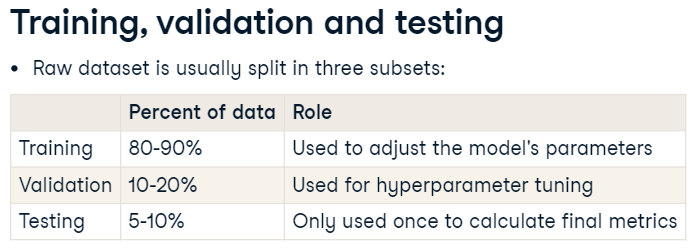

Aqui, vamos nos concentrar na avaliação das seguintes métricas em PyTorch: ***loss*** e a **precisão** durante o **treinamento e validação**. Lembre-se de que em tarefas de **classificação**, a precisão é uma medida de quão bem um modelo prevê corretamente os rótulos verdadeiros.

**Calculo da Perda**

Primeiro, vamos calcular a **perda de treinamento**, que é calculada somando a perda em cada iteração do dataloader. No final de cada época, calculamos o valor médio da perda de treinamento.

No PyTorch, começamos inicializando a perda de treinamento como $\small zero$. Em seguida, iteramos pelo dataloader de treinamento, realizamos o *feedforward*  e calculamos a perda. Além de calcular os gradientes e atualizar os pesos como de costume, adicionamos a perda atual às perdas de treinamento anteriores. O método `.item()` do tensor de perda retorna o número Python contido no tensor. Lembre-se de que uma volta completa pelo dataloader é uma época. Calculamos a perda média dividindo a perda total pelo comprimento do dataloader: o número de lotes em nosso conjunto de dados.

In [17]:
import torch.optim as optim
from tqdm import trange

In [18]:
# Features:
x = np.random.rand(200,200)
y = np.random.randint(2, size=x.shape[0])

# Shapes:
print(x.shape,y.shape)

(200, 200) (200,)


In [19]:
# Preparando contagem de quantidade de classes:
_, contagem = np.unique(y, return_counts=True)

# Definindo elementos do modelo:
n_features = x.shape[1]
n_classes = sum(contagem.shape)

print(f'({n_features},{n_classes})')

(200,2)


In [20]:
dataset = TensorDataset(torch.tensor(x).float(), torch.tensor(y).float())
dataloader = DataLoader(dataset,batch_size = 2 , shuffle=True)

In [21]:
# Criando o primeiro Modelo:
model = nn.Sequential(
    nn.Linear(n_features, n_features),   # Primeira Camada Linear, entrada: 5, saída: 5
    nn.Linear(n_features, 20),           # Segunda Camada Linear, entrada: 5, saída: 20
    nn.Linear(20, 10),          # Terceira Camada Linear, entrada: 20, saída: 10
    nn.Linear(10, n_classes),   # Camada de saída, entrada: 10, saída: número de classes
    nn.Softmax(dim=-1)          # Função de ativação Softmax
)

In [22]:
# Definindo função de perda e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
# Numero de épocas:
num_epochs = 100

In [24]:
# Loop de treinamento:
training_loss = float(0)
for epoch in trange(num_epochs):
  # Setando o optimizador:
  optimizer.zero_grad()

  for batch_x, batch_y in dataloader:
    # Feedforward:
    pred = model(batch_x)

    # Calculando a perda:
    loss = criterion(pred, batch_y.long())

    # Backpropagation:
    loss.backward()

    # Atualizando os pesos:
    optimizer.step()

    # Atualizando a perda de treinamento:
    training_loss += loss.item()

epoch_loss = training_loss / len(dataloader)
print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

100%|██████████| 100/100 [00:45<00:00,  2.20it/s]

Epoch 100/100, Loss: 81.2574


**Perda da Validação (ajuste dos Hiperparâmetros)**

Para calcular a perda de validação, adotamos uma abordagem semelhante. Após cada época de treinamento, iteramos pelo dataloader contendo o conjunto de dados de validação. O *loop* da época de validação é ligeiramente diferente. Primeiro, precisamos usar o método `.eval()` do modelo para colocar o modelo no modo de avaliação, porque algumas camadas nos modelos PyTorch se comportam de maneira diferente nos estágios de treinamento e validação. Também adicionamos um contexto Python com `torch.no_grad`, indicando que não faremos cálculo de gradientes nesta época. A perda de validação é então calculada de maneira semelhante à perda de treinamento. Configuramos o modelo de volta ao modo de treinamento no final da época de validação, para que possamos executar outra época de treinamento.

In [25]:
# Preparando o modelo para avaliação:
validation_loss=float(0)
model.eval() # Colocando o modelo em modo avaliação
model

Sequential(
  (0): Linear(in_features=200, out_features=200, bias=True)
  (1): Linear(in_features=200, out_features=20, bias=True)
  (2): Linear(in_features=20, out_features=10, bias=True)
  (3): Linear(in_features=10, out_features=2, bias=True)
  (4): Softmax(dim=-1)
)

In [26]:
with torch.no_grad():
  for batch_x, batch_y in dataloader:
    # Feedforward:
    pred = model(batch_x)

    # Calculando a perda:
    loss = criterion(pred, batch_y.long())

    validation_loss += loss.item()

epoch_loss = validation_loss/len(dataloader)
print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

Epoch 100/100, Loss: 0.8133


In [27]:
# Voltando o modelo ao modo treinamento:
model.train();model

Sequential(
  (0): Linear(in_features=200, out_features=200, bias=True)
  (1): Linear(in_features=200, out_features=20, bias=True)
  (2): Linear(in_features=20, out_features=10, bias=True)
  (3): Linear(in_features=10, out_features=2, bias=True)
  (4): Softmax(dim=-1)
)

**Overfitting**

Manter o controle das perdas de validação e treinamento durante o treinamento nos ajuda a detectar o ***overfitting***. O ***overfitting*** ocorre quando o modelo para de generalizar e o desempenho no conjunto de dados de **validação degrada**. Esta figura mostra que o *overfitting* ocorre quando a perda de validação é alta, mas a perda de treinamento não é.


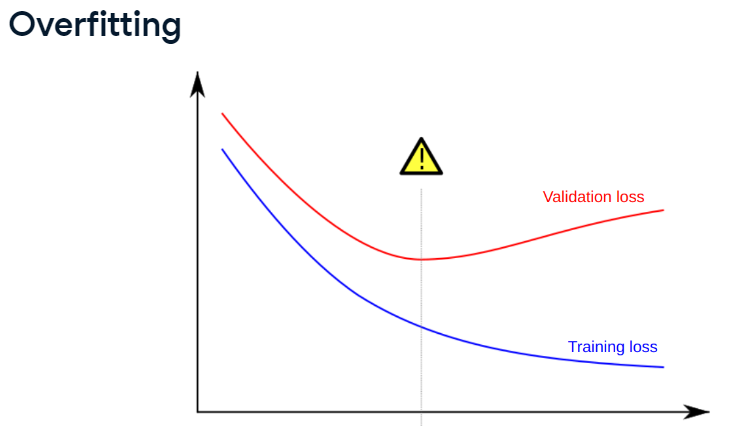

Note que é a mesma abordagem descrita no [An Introduction a Statistical Learning](https://www.statlearning.com/) para chegar *overffiting* numa **regressão linear**, a diferênça é que lá estamos comparando o $\small \text{MSE}_{\text{treino}}$ com o $\small \text{MSE}_{\text{teste}}$. Aqui é a perda de **treino** com a de **validação**.

**TorchMetrics**

Além da *loss*, também queremos acompanhar outras métricas para avaliar quão bem nosso modelo está prevendo respostas corretas. Para fazer isso, vamos usar um novo pacote chamado `torchmetrics`. Se estivermos realizando classificação, podemos usar o `torchmetrics` para criar uma métrica de precisão. Em cada iteração do `dataloader`, chamamos essa métrica usando as saídas do modelo e os rótulos verdadeiros. A métrica de precisão recebe probabilidades e rótulos de números únicos como entrada. A variável de saída aqui seriam as probabilidades retornadas pela função $\small softmax$. Se os rótulos contiverem classes codificadas em *one-hot*, precisaremos da função $\small argmax$ para obter números em vez de vetores *one-hot*. No final da época, calculamos a precisão total usando o método `.compute()` da métrica. Finalmente, usamos `.reset()` para redefinir a métrica para a próxima época. A precisão é calculada da mesma forma para treinamento e validação.

In [28]:
# Instalando torchmetrics
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 11.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [29]:
# Importando torchmetrics:
import torchmetrics

In [30]:
# Instanciando métrica de acuracia:
acuracy = torchmetrics.Accuracy(task='multiclass',num_classes=n_classes)

# Checando acurácia:
accs = []
for i, data in enumerate(dataloader,0):
  features, labels = data
  output = model(features)
  # Calculando a acurácia sobre cada batch:
  acc=acuracy(output,labels)
  accs.append(acc)
print(accs)

[tensor(0.5000), tensor(1.), tensor(0.), tensor(0.5000), tensor(0.5000), tensor(1.), tensor(0.5000), tensor(1.), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(1.), tensor(0.), tensor(0.5000), tensor(1.), tensor(0.), tensor(0.5000), tensor(0.5000), tensor(1.), tensor(0.5000), tensor(0.), tensor(0.5000), tensor(1.), tensor(1.), tensor(0.), tensor(0.5000), tensor(0.5000), tensor(1.), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(1.), tensor(0.5000), tensor(0.), tensor(1.), tensor(1.), tensor(0.), tensor(0.5000), tensor(1.), tensor(1.), tensor(1.), tensor(0.), tensor(0.5000), tensor(0.5000), tensor(0.5000), tensor(0.), tensor(0.5000), tensor(0.), tensor(0.), tensor(0.5000), tensor(0.), tensor(1.), tensor(0.), tensor(1.), tensor(1.), tensor(0.), tensor(0.5000), tensor(0.), tensor(0.5000), tensor(0.), tensor(1.), tensor(0.5000), tensor(0.5000), tensor(0.), tensor(0.), tensor(0.), tensor(0.5000), tensor(0.5000), tensor(0.), tensor(0.), tensor(1.), tensor(1.),

In [31]:
# Calculando a acurácia sobre todas as épocas
acc = acuracy.compute()
print(f"Acurácia sobre todo o conjunto de dados: {round(float(acc),2)}")

Acurácia sobre todo o conjunto de dados: 0.5


In [32]:
# Resetando a métrica para uma proxima época:
acuracy.reset()

# Lidando com o Overfitting:

O *overfitting* acontece quando o modelo não se generaliza para dados não vistos. Se não treinarmos o modelo corretamente, ele começará a memorizar os dados de treinamento, o que leva a um bom desempenho no conjunto de treinamento, mas a um desempenho ruim no conjunto de validação.

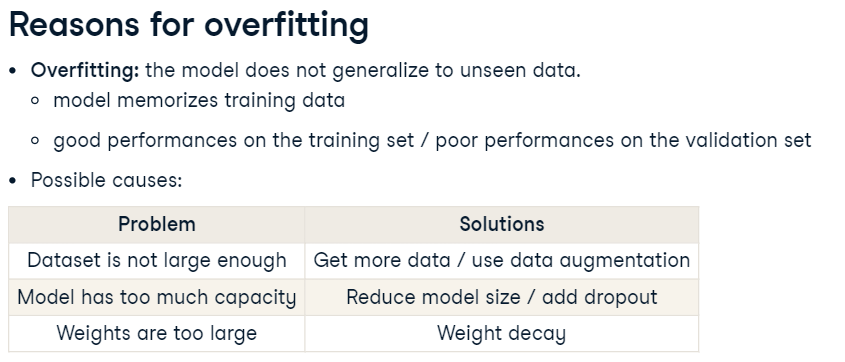

Para combater o *overfitting*, podemos reduzir o tamanho do modelo ou adicionar um novo tipo de camada chamada ***dropout***. Também podemos usar *weight decay* para forçar os parâmetros a permanecerem pequenos. Podemos obter mais dados ou usar a técnica de aumento de dados (*data augmentation*). Vamos aprender como usar algumas dessas estratégias.

## Regularização

Uma maneira comum de combater o *overfitting* é adicionar camadas de dropout à nossa rede neural. ***Dropout*** é uma técnica de "regularização" onde, aleatoriamente, uma fração dos neurônios de entrada é configurada para $\small zero$ em cada atualização, efetivamente "eliminando" esses neurônios.

Para quem já viu **regularização no contexto de regressão linear**, note a semelhança conceitual com a **regularização por lasso** que se dá penalizando os $\small \beta$'s de uma regressão.

$$\sum_{i=1}^n\left(y_i-\beta_0-\sum_{j-1}^p\beta_jx_{ij}\right)^2+\lambda\sum_{j=1}^p|\beta_j|$$

Onde,

* $\sum_{i=1}^n\left(y_i-\beta_0-\sum_{j-1}^p\beta_jx_{ij}\right)^2$: É o *residual sum of squares*, a soma dos erros quadráticos. A função objetivo que queremos otimizar numa regressão.

* $\lambda\sum_{j=1}^p|\beta_j|$: É o termo de penalização do **lasso**. O interessante do **lasso**, é que ele serve como um *feature selection*, justamente zerando coeficientes que tenham pouca significancia para a predição da variável resposta.

Voltando as *neural networks*, as conexões correspondentes são temporariamente removidas da rede, tornando-a menos propensa a depender excessivamente de características específicas.

In [33]:
# Instanciando modelo:
model = nn.Sequential(nn.Linear(8,4),
                      nn.ReLU(),
                      nn.Dropout(p=.5))

# Gerando feature:
features=torch.randn((1,8))

# Feedforward:
model(features)

tensor([[0.2844, 0.0000, 0.2339, 0.0000]], grad_fn=<MulBackward0>)

***Dropout*** pode ser adicionado aos modelos conforme mostrado. O argumento `p` indica a probabilidade de definir um neurônio para $\small zero$. Aqui, configuramos $\small \text{50%}$ dos neurônios do tensor de saída para zero. Geralmente, as camadas de *dropout* são adicionadas **após** as funções de ativação. **As camadas de *dropout* se comportam de maneira diferente entre o treinamento e a avaliação, e não devemos esquecer de alternar o modo do modelo utilizando `model.eval()` e `model.train()`**.

## Regularização com Decaimento dos pesos

A próxima estratégia para reduzir o *overfitting* que vamos descobrir é o *weight decay*, outra forma de **regularização**. Em PyTorch, o *weight decay* pode ser adicionado ao otimizador conforme mostrado. Ele é controlado pelo hiperparâmetro `weight_decay` que consta no método **otimizador**, que deve variar entre $\small zero$ e $\small 1$, mas geralmente é muito pequeno.

In [34]:
# Instanciando otimizador com o decaimento de pesos:
optimizer = optim.SGD(model.parameters(), lr=1e-3,weight_decay=1e-4);optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0.0001
)

Quando o hiperparâmetro `weight_decay` do otimizador é definido, ele adiciona um termo adicional à etapa de atualização dos parâmetros que incentiva pesos menores. Este termo de regularização é **proporcional** ao valor atual do peso e é subtraído do gradiente durante a retropropagação. O termo de *weight decay* penaliza efetivamente pesos grandes e ajuda a prevenir o *overfitting*. Quanto maior definirmos este parâmetro, menor a probabilidade de nosso modelo sobreajustar, permitindo que ele se generalize melhor para novos dados.

## Data Augmentation

Obter mais dados pode ser caro. No entanto, os pesquisadores encontraram uma maneira de aumentar artificialmente o tamanho e a diversidade de seus conjuntos de dados usando a técnica de aumento de dados (*data augmentation*). Aumento de dados é comumente aplicado a dados de imagem, que podem ser **rotacionados** e **escalonados**, de modo que diferentes vistas do mesmo rosto se tornem disponíveis como novos pontos de dados. Além de uma estratégia interessante para se obter mais dados, é um conceito importante para combater o *overfitting*.

Algumas abordagens de *data augmentation* que podemos considerar são:

1. **Adição de Ruído:** Adicionar ruído aleatório aos dados para criar variações.

2. **Interpolação (SMOTE):** Gerar novos exemplos interpolando entre pontos próximos.

3. **Jittering:** Pequenas perturbações nos dados originais.

4. **Transformações Estatísticas:** Aplicar transformações estatísticas como a soma de ruído Gaussiano.

In [35]:
# Biblioteca utilizada:
import numpy as np

In [48]:
# Função para avaliar dados:
def check(entrada=None, saida=None, entrada_transformada=None, saida_transformada=None):
  # Checando dados:
  if entrada is not None:
    print('Entradas:')
    print(entrada,'\n')

  if saida is not None:
    print('Saídas :')
    print(saida,'\n')

  if entrada_transformada is not None:
    print('Entradas Transformadas:')
    print(entrada_transformada,'\n')

  if saida_transformada is not None:
    print('Saídas Transformadas:')
    print(saida_transformada,'\n')

**Data augmentation por Adição de Ruído (gaussiano)**

In [49]:
# Função para adicionar Ruído (gaussiano):
def add_noise(x, noise_level=0.01):
    noise = np.random.normal(0, noise_level, x.shape)
    return x + noise

# Gerando dados:
x_augmented = add_noise(x)

# Checando dados:
check(entrada = x, entrada_transformada = x_augmented)

Entradas:
[[0.49974951 0.99312183 0.63978813 ... 0.57049497 0.84964202 0.34548697]
 [0.54123141 0.86944175 0.05318764 ... 0.00875125 0.67973706 0.87061902]
 [0.88121369 0.01237245 0.96394337 ... 0.7057598  0.21960885 0.5115419 ]
 ...
 [0.626985   0.62341866 0.22435495 ... 0.28036841 0.18494906 0.85358067]
 [0.98245533 0.397653   0.15873318 ... 0.82242133 0.32709143 0.96531944]
 [0.49391602 0.67922073 0.14015782 ... 0.19931616 0.01320224 0.22827449]] 

Entradas Transformadas:
[[ 0.50803437  1.00443103  0.65001969 ...  0.57095681  0.85569997
   0.34311346]
 [ 0.55199401  0.87199037  0.04880982 ... -0.01615908  0.67704735
   0.87930256]
 [ 0.88324127  0.00477258  0.96233061 ...  0.69531955  0.21092136
   0.4883348 ]
 ...
 [ 0.6215906   0.61806696  0.23617927 ...  0.29117911  0.19249775
   0.84174049]
 [ 0.98868563  0.39303454  0.15928973 ...  0.83174013  0.32452618
   0.96109091]
 [ 0.50326765  0.68020933  0.13495229 ...  0.19881552  0.00610702
   0.22041496]] 



**Interpolação (SMOTE)**

In [43]:
# Importando lib necessária:
from imblearn.over_sampling import SMOTE

In [53]:
# Instanciando classe de interpolação:
smote = SMOTE()

x_resampled, y_resampled = smote.fit_resample(x, y)

# Checando dados:
check(entrada = x, saida = y, entrada_transformada = x_resampled, saida_transformada = y_resampled)

Entradas:
[[0.49974951 0.99312183 0.63978813 ... 0.57049497 0.84964202 0.34548697]
 [0.54123141 0.86944175 0.05318764 ... 0.00875125 0.67973706 0.87061902]
 [0.88121369 0.01237245 0.96394337 ... 0.7057598  0.21960885 0.5115419 ]
 ...
 [0.626985   0.62341866 0.22435495 ... 0.28036841 0.18494906 0.85358067]
 [0.98245533 0.397653   0.15873318 ... 0.82242133 0.32709143 0.96531944]
 [0.49391602 0.67922073 0.14015782 ... 0.19931616 0.01320224 0.22827449]] 

Saídas :
[1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0
 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1
 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0
 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0] 

Entradas Transformadas:
[[0.49974951 0.99312183 0.63978813 ... 0.57049497 0.84964202 0.34548697]
 [0.54123141 0.86944175 0.053

Note que para esse caso, não houve transformações. O **SMOTE** (*Synthetic Minority Over-sampling Technique*) é projetado para lidar com conjuntos de dados **desbalanceados**, onde uma classe é minoritária em comparação com a outra(s). Se as classes já estiverem balanceadas, o **SMOTE** não terá um efeito significativo, e os dados de saída podem parecer idênticos aos dados de entrada.

Todavia, a titulo de estudo, de conhecimento sobre a técnica, ele foi colocado aqui junto com as outras técnicas.

**jitter**

In [56]:
def jitter(x, sigma=0.01):
    return x + np.random.normal(loc=0, scale=sigma, size=x.shape)

# Gerando dados:
x_jittered = jitter(x)

# Checando dados gerados:
check(entrada = x, entrada_transformada = x_jittered )

Entradas:
[[0.49974951 0.99312183 0.63978813 ... 0.57049497 0.84964202 0.34548697]
 [0.54123141 0.86944175 0.05318764 ... 0.00875125 0.67973706 0.87061902]
 [0.88121369 0.01237245 0.96394337 ... 0.7057598  0.21960885 0.5115419 ]
 ...
 [0.626985   0.62341866 0.22435495 ... 0.28036841 0.18494906 0.85358067]
 [0.98245533 0.397653   0.15873318 ... 0.82242133 0.32709143 0.96531944]
 [0.49391602 0.67922073 0.14015782 ... 0.19931616 0.01320224 0.22827449]] 

Entradas Transformadas:
[[0.52290271 0.99497729 0.65318258 ... 0.58336857 0.85896177 0.35150929]
 [0.54246076 0.86392527 0.06851354 ... 0.00922761 0.67663598 0.86932815]
 [0.89279828 0.01973721 0.96962038 ... 0.70731436 0.20565303 0.51614795]
 ...
 [0.63370829 0.62212409 0.22719381 ... 0.28189328 0.17568181 0.85508649]
 [0.99253311 0.41174622 0.15440692 ... 0.84265627 0.32480177 0.96906505]
 [0.46920246 0.67288018 0.12584444 ... 0.20083284 0.01379274 0.23858971]] 



**Transformações estatísticas**

São outras formas estatísticas de lidar com os dados. Existem um série de transformações possíveis aqui, porém que fazem mais sentido pensadas para casos específicos. É uma abordagem mais teórica, que faz mais sentido dentro de um contexto específico.